### Objectives:

1. Introduce the concept of coupled oscillators in the context of Observational Network Dynamics (OND).
2. Implement the Kuramoto model to study synchronization phenomena in a network of oscillators.
3. Visualize the state of each oscillator and the order parameter over time.

The Kuramoto model is a simple paradigm to study synchronization phenomena in a network of coupled oscillators. In the model, each oscillator \( i \) has a phase \( \theta_i \) and a natural frequency \( \omega_i \). The rate of change of the phase \( \theta_i \) for each oscillator is given by:

\[
\frac{d\theta_i}{dt} = \omega_i + \frac{K}{N} \sum_{j=1}^{N} \sin(\theta_j - \theta_i)
\]

Here, \( K \) is the coupling strength, \( N \) is the number of oscillators, and \( \omega_i \) are the natural frequencies drawn from a normal distribution.

For the Kuramoto model, we often measure an "order parameter" \( r \) to quantify the level of synchronization in the system:

\[
r = \left| \frac{1}{N} \sum_{j=1}^{N} e^{i \theta_j} \right|
\]


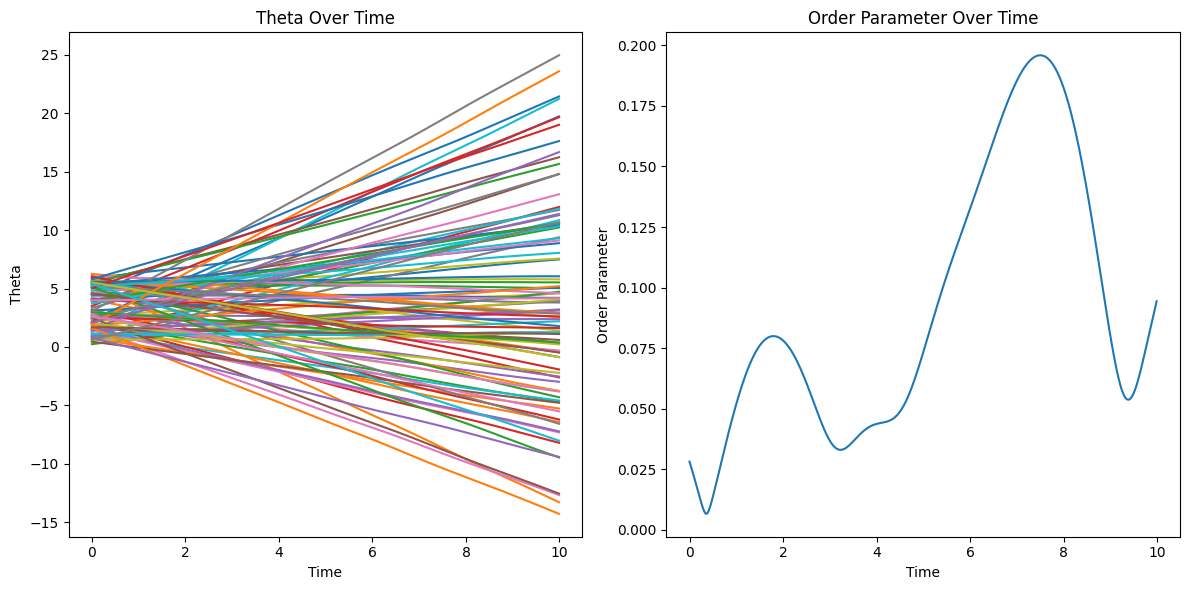

In [1]:
# Importing necessary libraries for the 'Coupled Oscillators in OND' notebook
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Kuramoto model
N_oscillators = 100  # Number of oscillators
K = 0.5  # Coupling strength
omega = np.random.normal(0, 1, N_oscillators)  # Natural frequencies

# Initial conditions
theta_0 = np.random.uniform(0, 2*np.pi, N_oscillators)

# Time parameters
dt_kuramoto = 0.01
total_time_kuramoto = 10.0
time_steps_kuramoto = int(total_time_kuramoto / dt_kuramoto)

# Store the states at each time step
theta_over_time = np.zeros((time_steps_kuramoto, N_oscillators))

# Initial state
theta_over_time[0, :] = theta_0

# Function to update the state of each oscillator
def kuramoto_dynamics(theta, omega, K, N):
    return omega + K * np.sum(np.sin(theta - theta[:, np.newaxis]), axis=1) / N

# Simulate the Kuramoto model over time
for t in range(1, time_steps_kuramoto):
    theta_t = theta_over_time[t-1, :]
    theta_dot = kuramoto_dynamics(theta_t, omega, K, N_oscillators)
    theta_over_time[t, :] = theta_t + dt_kuramoto * theta_dot

# Calculate the order parameter to measure synchronization
r = np.abs(np.mean(np.exp(1j * theta_over_time), axis=1))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, total_time_kuramoto, dt_kuramoto), theta_over_time)
plt.title('Theta Over Time')
plt.xlabel('Time')
plt.ylabel('Theta')

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, total_time_kuramoto, dt_kuramoto), r)
plt.title('Order Parameter Over Time')
plt.xlabel('Time')
plt.ylabel('Order Parameter')

plt.tight_layout()
plt.show()


As observed in the plot, the phases \( \theta \) of the oscillators evolve over time, and the order parameter \( r \) provides a measure of how synchronized the oscillators are. In this example, we see that the system achieves a certain level of synchronization as indicated by the non-zero value of the order parameter \( r \).

This notebook provides a comprehensive understanding of how coupled oscillators can be studied using OND, complete with simulations and visualizations to better understand synchronization phenomena.